In [133]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing


Загружаем датасет

In [134]:
df = pd.read_csv('ClientsData.csv')
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


• **AGREEMENT_RK** — уникальный идентификатор объекта в выборке;

• **TARGET** — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);

• **AGE** — возраст клиента;

• **SOCSTATUS_WORK_FL** — социальный статус клиента относительно работы (1 — работает, 0 — не работает);

• **SOCSTATUS_PENS_FL** — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);

• **GENDER** — пол клиента (1 — мужчина, 0 — женщина);

• **CHILD_TOTAL** — количество детей клиента;

• **DEPENDANTS** — количество иждивенцев клиента;

• **PERSONAL_INCOME** — личный доход клиента (в рублях);

• **LOAN_NUM_TOTAL** — количество ссуд клиента;

• **LOAN_NUM_CLOSED** — количество погашенных ссуд клиента.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Описываем характеристики признаков

In [136]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
AGE,15223.000000,40.406096,11.601068,21.000000,30.000000,39.000000,50.000000,67.000000
SOCSTATUS_WORK_FL,15223.000000,0.909610,0.286748,0.000000,1.000000,1.000000,1.000000,1.000000
SOCSTATUS_PENS_FL,15223.000000,0.134468,0.341165,0.000000,0.000000,0.000000,0.000000,1.000000
GENDER,15223.000000,0.654536,0.475535,0.000000,0.000000,1.000000,1.000000,1.000000
CHILD_TOTAL,15223.000000,1.099389,0.995411,0.000000,0.000000,1.000000,2.000000,10.000000
DEPENDANTS,15223.000000,0.645208,0.812252,0.000000,0.000000,0.000000,1.000000,7.000000
PERSONAL_INCOME,15223.000000,13853.836323,9015.467617,24.000000,8000.000000,12000.000000,17000.000000,250000.000000
LOAN_NUM_TOTAL,15223.000000,1.387769,0.793566,1.000000,1.000000,1.000000,2.000000,11.000000
LOAN_NUM_CLOSED,15223.000000,0.751889,0.988499,0.000000,0.000000,0.000000,1.000000,11.000000
LOAN_DLQ_NUM,15223.000000,0.195362,0.685022,0.000000,0.000000,0.000000,0.000000,13.000000


In [137]:
df1 = df.loc[df['TARGET'] == 0]

In [138]:
df1.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
AGE,13411.000000,40.849005,11.697037,21.000000,31.000000,40.000000,51.000000,67.000000
SOCSTATUS_WORK_FL,13411.000000,0.901350,0.298203,0.000000,1.000000,1.000000,1.000000,1.000000
SOCSTATUS_PENS_FL,13411.000000,0.145105,0.352220,0.000000,0.000000,0.000000,0.000000,1.000000
GENDER,13411.000000,0.659906,0.473758,0.000000,0.000000,1.000000,1.000000,1.000000
CHILD_TOTAL,13411.000000,1.095146,0.989226,0.000000,0.000000,1.000000,2.000000,10.000000
DEPENDANTS,13411.000000,0.629632,0.800139,0.000000,0.000000,0.000000,1.000000,7.000000
PERSONAL_INCOME,13411.000000,13540.436161,8794.221229,24.000000,8000.000000,12000.000000,16000.000000,250000.000000
LOAN_NUM_TOTAL,13411.000000,1.397435,0.801549,1.000000,1.000000,1.000000,2.000000,11.000000
LOAN_NUM_CLOSED,13411.000000,0.774588,0.997894,0.000000,0.000000,1.000000,1.000000,11.000000
LOAN_DLQ_NUM,13411.000000,0.182313,0.675514,0.000000,0.000000,0.000000,0.000000,13.000000


In [139]:
df2 = df.loc[df['TARGET'] == 1]

In [140]:
df2.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
AGE,1812.000000,37.128035,10.290703,21.000000,28.000000,36.000000,45.000000,65.000000
SOCSTATUS_WORK_FL,1812.000000,0.970751,0.168551,0.000000,1.000000,1.000000,1.000000,1.000000
SOCSTATUS_PENS_FL,1812.000000,0.055740,0.229481,0.000000,0.000000,0.000000,0.000000,1.000000
GENDER,1812.000000,0.614790,0.486779,0.000000,0.000000,1.000000,1.000000,1.000000
CHILD_TOTAL,1812.000000,1.130795,1.039794,0.000000,0.000000,1.000000,2.000000,10.000000
DEPENDANTS,1812.000000,0.760486,0.888621,0.000000,0.000000,1.000000,1.000000,6.000000
PERSONAL_INCOME,1812.000000,16173.378035,10217.147092,3000.000000,10000.000000,15000.000000,20000.000000,150000.000000
LOAN_NUM_TOTAL,1812.000000,1.316225,0.728001,1.000000,1.000000,1.000000,1.000000,8.000000
LOAN_NUM_CLOSED,1812.000000,0.583885,0.898569,0.000000,0.000000,0.000000,1.000000,8.000000
LOAN_DLQ_NUM,1812.000000,0.291943,0.744782,0.000000,0.000000,0.000000,0.000000,7.000000


Визуализируем распределения признаков

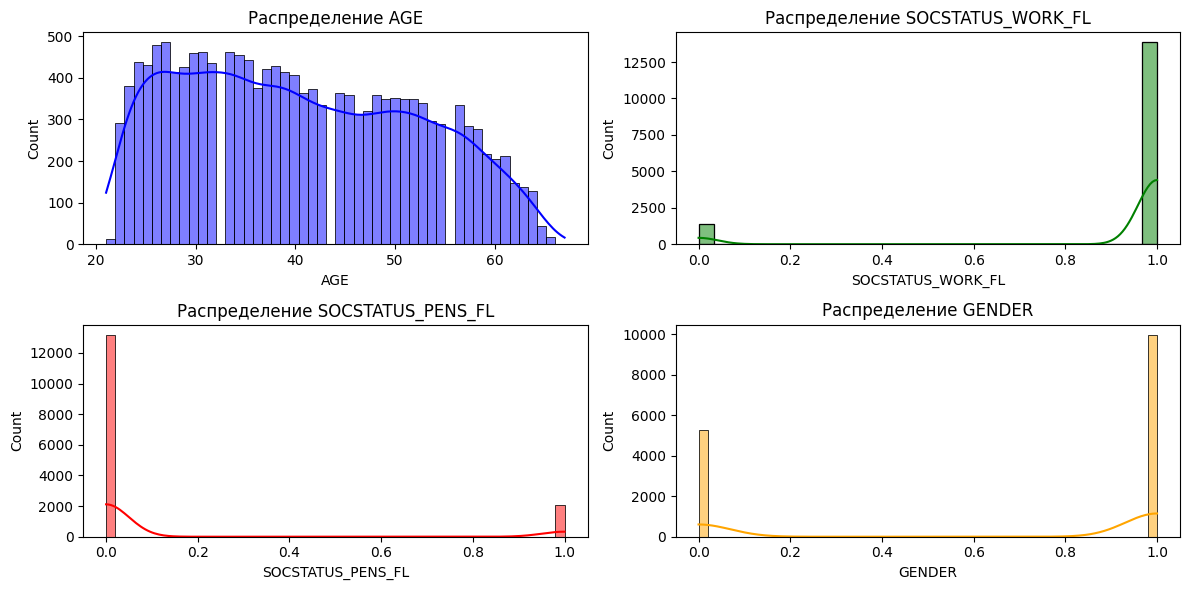

In [141]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], bins=50, kde=True, color='blue')
plt.title('Распределение AGE')

plt.subplot(2, 2, 2)
sns.histplot(df['SOCSTATUS_WORK_FL'], bins=30, kde=True, color='green')
plt.title('Распределение SOCSTATUS_WORK_FL')

plt.subplot(2, 2, 3)
sns.histplot(df['SOCSTATUS_PENS_FL'], bins=50, kde=True, color='red')
plt.title('Распределение SOCSTATUS_PENS_FL')

plt.subplot(2, 2, 4)
sns.histplot(df['GENDER'], bins=50, kde=True, color='orange')
plt.title('Распределение GENDER')


plt.tight_layout()
plt.show()

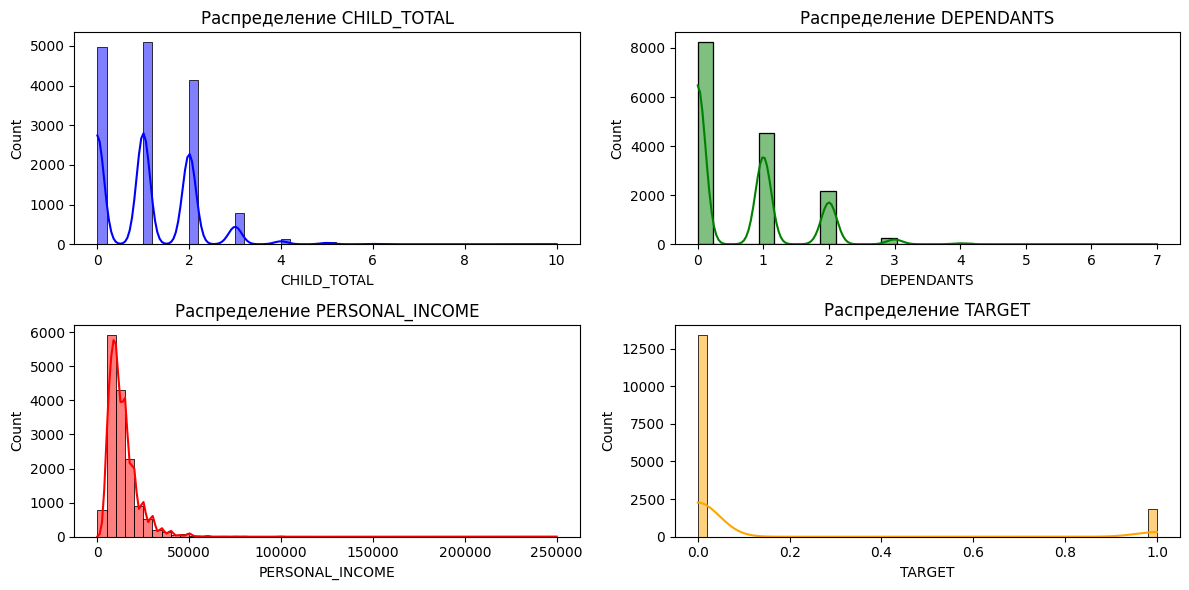

In [142]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['CHILD_TOTAL'], bins=50, kde=True, color='blue')
plt.title('Распределение CHILD_TOTAL')

plt.subplot(2, 2, 2)
sns.histplot(df['DEPENDANTS'], bins=30, kde=True, color='green')
plt.title('Распределение DEPENDANTS')

plt.subplot(2, 2, 3)
sns.histplot(df['PERSONAL_INCOME'], bins=50, kde=True, color='red')
plt.title('Распределение PERSONAL_INCOME')

plt.subplot(2, 2, 4)
sns.histplot(df['TARGET'], bins=50, kde=True, color='orange')
plt.title('Распределение TARGET')


plt.tight_layout()
plt.show()

Строим матрицу корреляций

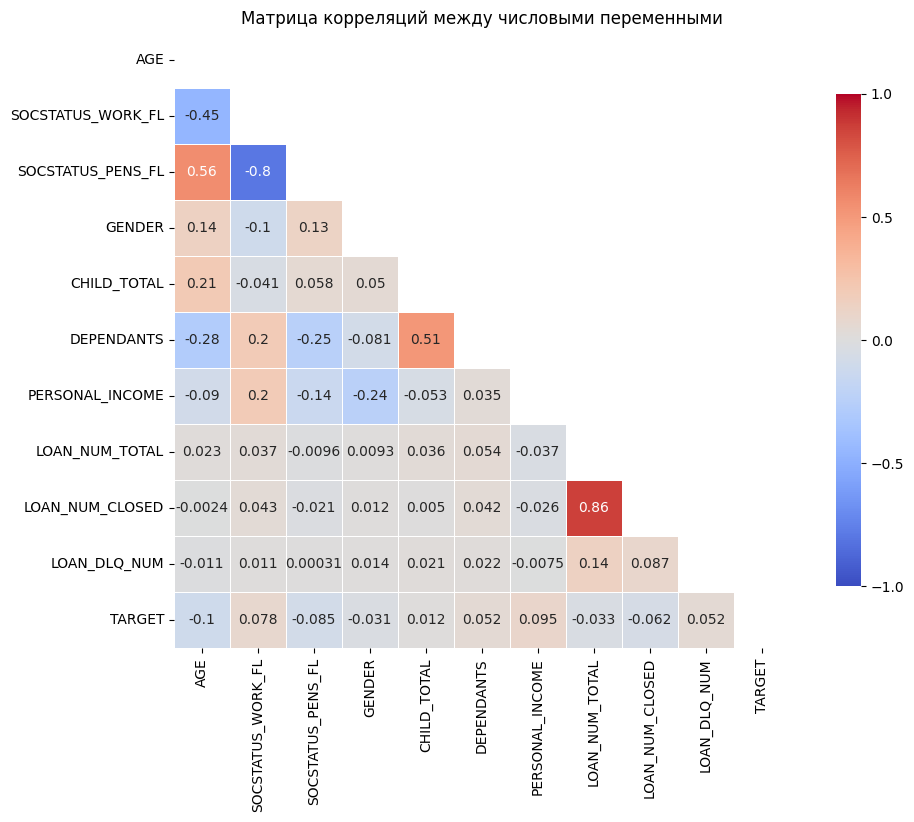

In [143]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

In [144]:
min_max_scaler = preprocessing.MinMaxScaler()


Делим датасет на обучающий и тестовый

In [145]:
pip install imbalanced-learn

In [146]:

from imblearn.over_sampling import SMOTE



In [147]:

X_0 = df.drop('TARGET', axis=1)
y_0 = df['TARGET']
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
X, y = smote.fit_resample(X_0, y_0)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)



/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


**Строим модель логистической регресии по всем признакам**

In [148]:
model1 = LogisticRegression(max_iter=3000)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² (все признаки): {r2:.4f}')
print(f'MSE (все признаки): {mse:.4f}')
print(f'MAE (все признаки): {mae:.4f}')


R² (все признаки): -0.3295
MSE (все признаки): 0.3324
MAE (все признаки): 0.3324


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
# Оценка качества модели
print("Точность:", accuracy_score(y_test, (y_pred > 0.5).astype(int)))
print("Точность:", precision_score(y_test, (y_pred > 0.5).astype(int)))
print("Полнота:", recall_score(y_test, (y_pred > 0.5).astype(int)))
print("F1-мера:", f1_score(y_test, (y_pred > 0.5).astype(int)))
print("AUC:", roc_auc_score(y_test, y_pred))

Точность: 0.6676297884238979
Точность: 0.6551069703243616
Полнота: 0.7078672632363907
F1-мера: 0.6804659498207886
AUC: 0.6676335384215504


Качество модели низкое

Удалим признаки, кореллирующие с другими признаками

In [150]:
df1 = df.drop(['SOCSTATUS_PENS_FL', 'LOAN_NUM_CLOSED', 'DEPENDANTS'], axis=1)


In [151]:
X_0 = df.drop('TARGET', axis=1)
y_0 = df['TARGET']
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
X, y = smote.fit_resample(X_0, y_0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [152]:
model2 = LogisticRegression(max_iter=3000)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² (все признаки): {r2:.4f}')
print(f'MSE (все признаки): {mse:.4f}')
print(f'MAE (все признаки): {mae:.4f}')

R² (все признаки): -0.3190
MSE (все признаки): 0.3298
MAE (все признаки): 0.3298


In [153]:
# Оценка качества модели
print("Точность:", accuracy_score(y_test, (y_pred > 0.5).astype(int)))
print("Точность:", precision_score(y_test, (y_pred > 0.5).astype(int)))
print("Полнота:", recall_score(y_test, (y_pred > 0.5).astype(int)))
print("F1-мера:", f1_score(y_test, (y_pred > 0.5).astype(int)))
print("AUC:", roc_auc_score(y_test, y_pred))

Точность: 0.6702395377015565
Точность: 0.6548507462686567
Полнота: 0.7197986577181208
F1-мера: 0.6857904085257549
AUC: 0.6702441564452674


Качество модели не улучшилось

Применение CatBoost

In [154]:
pip install catboost

In [155]:
from catboost import CatBoostClassifier

In [158]:
X_f = min_max_scaler.fit_transform(df.drop(["TARGET"], axis=1))
y_f = df['TARGET']

X_tr, X_tst, y_tr, y_tst = train_test_split(X_f, y_f, test_size=0.4, stratify=y_f, random_state=42)

In [159]:

X_0 = min_max_scaler.fit_transform(df.drop(["TARGET"], axis=1))
y_0 = df['TARGET']
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
X, y = smote.fit_resample(X_0, y_0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [160]:
model3 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=4)
model3.fit(X_train, y_train)

0:	learn: 0.6795829	total: 6.09ms	remaining: 6.08s
1:	learn: 0.6706604	total: 11.7ms	remaining: 5.84s
2:	learn: 0.6604395	total: 17ms	remaining: 5.64s
3:	learn: 0.6539521	total: 21.7ms	remaining: 5.41s
4:	learn: 0.6475966	total: 26.9ms	remaining: 5.36s
5:	learn: 0.6429656	total: 31.5ms	remaining: 5.22s
6:	learn: 0.6396257	total: 36.8ms	remaining: 5.21s
7:	learn: 0.6337715	total: 44ms	remaining: 5.45s
8:	learn: 0.6244661	total: 50.5ms	remaining: 5.56s
9:	learn: 0.6194252	total: 56.4ms	remaining: 5.58s
10:	learn: 0.6172768	total: 61.5ms	remaining: 5.53s
11:	learn: 0.6129546	total: 66.7ms	remaining: 5.49s
12:	learn: 0.6070252	total: 72ms	remaining: 5.47s
13:	learn: 0.6034505	total: 77.6ms	remaining: 5.46s
14:	learn: 0.5993085	total: 82.4ms	remaining: 5.41s
15:	learn: 0.5961204	total: 87.4ms	remaining: 5.37s
16:	learn: 0.5947505	total: 92.4ms	remaining: 5.34s
17:	learn: 0.5917756	total: 97.7ms	remaining: 5.33s
18:	learn: 0.5868114	total: 103ms	remaining: 5.32s
19:	learn: 0.5833840	total: 1

In [161]:
y_pred = model3.predict(X_test)

In [162]:
y_pr = model3.predict(X_tst)

In [163]:
accuracy = model3.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9063004846526656


In [164]:
# Оценка качества модели
print("Точность:", accuracy_score(y_test, y_pred))
print("Точность:", precision_score(y_test, y_pred, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred))

Точность: 0.9063004846526656
Точность: 0.9584852734922861
Полнота: 0.8493661446681581
F1-мера: 0.900632577754349
AUC: 0.9062934103062461


In [165]:
# Оценка качества модели
print("Точность:", accuracy_score(y_tst, y_pr))
print("Точность:", precision_score(y_tst, y_pr, average = 'binary'))
print("Полнота:", recall_score(y_tst, y_pr, average = 'binary'))
print("F1-мера:", f1_score(y_tst, y_pr, average = 'binary'))
print("AUC:", roc_auc_score(y_tst, y_pr))

Точность: 0.861904761904762
Точность: 0.2661290322580645
Полнота: 0.0910344827586207
F1-мера: 0.13566289825282632
AUC: 0.5285554520037279


Accuracy_score: 0.876 - Эта метрика говорит о том, что модель правильно классифицирует 87,61% всех случаев. Это может быть обманчиво, так как может быть дисбаланс классов.
Precision_score: 33.3% - Точность показывает, какой процент классифицированных как положительных случаев действительно положительны. Recall_score: 1.9% - Полнота показывает, какой процент всех положительных случаев был правильно идентифицирован моделью. F1_score: 0.037 - F1-мера является гармоническим средним между точностью и полнотой. Низкое значение F1 говорит о том, что модель не работает хорошо ни в одной из этих метрик. AUC: 0.507 - AUC (площадь под кривой ROC) является хорошей метрикой для оценки качества классификации, но значение 0.507 не является впечатляющим. Идеальное значение AUC равно 1.0, значение 0.5 соответствует случайному прогнозу.